In [104]:
import os
from PIL import Image,ImageOps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

def load_images_from_directory(directory):
    images = []
    labels = []
    # Iterate through each subfolder in the directory
    for class_name in os.listdir(directory):
        print(f"class name : {class_name}")
        class_folder = os.path.join(directory, class_name)
        print(f"class folder : {class_folder}")
        # Check if it's a directory
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg'):
                    image_path = os.path.join(class_folder, filename)
                    print(f"image name: {image_path}")
                    try:
                        image = Image.open(image_path)
                        print(f'type : {type(image)}')
                        # Convert the image to a NumPy array
                        image_array = np.array(image)
                        print(f'type np : {type(image_array)}')
                        images.append(cv2.resize(image_array,(129,129)))
                        #images.append(image_array)
                        labels.append(class_name) # Append the class label
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")
    return images, labels

In [105]:
#directory_path = "Indian_Medicinal_Plants"
directory_path = r"C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants"

In [106]:
i,l=load_images_from_directory(directory_path)

class name : AloeVera
class folder : C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\AloeVera
image name: C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\AloeVera\339.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>
type np : <class 'numpy.ndarray'>
image name: C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\AloeVera\340.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>
type np : <class 'numpy.ndarray'>
image name: C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\AloeVera\341.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>
type np : <class 'numpy.ndarray'>
image name: C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\AloeVera\342.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>
type np : <class 'numpy.ndarray'>
image name: C:\Vaishanvi\college\PS\data_set\Indian_Medicinal_Plants\Indian_Medicinal_Plants\

In [107]:
loaded_images, loaded_labels = np.array(i),np.array(l)

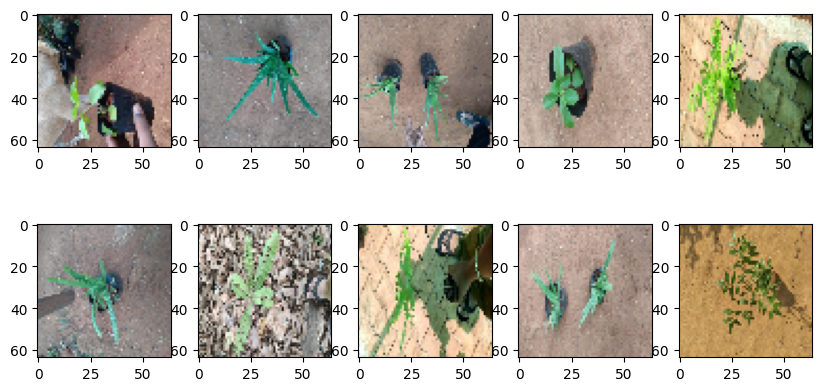

In [108]:
import random
num_images_to_select=10
selected_indices=random.sample(range(len(i)),num_images_to_select)
selected_images=[]
selected_images=[i[j] for j in selected_indices]
plt.figure(figsize=(10, 5))
sp=1
for n in range(0,10):
    plt.subplot(2, 5, sp) # 1 row, 5 columns
    plt.imshow(selected_images[n])
    sp+=1

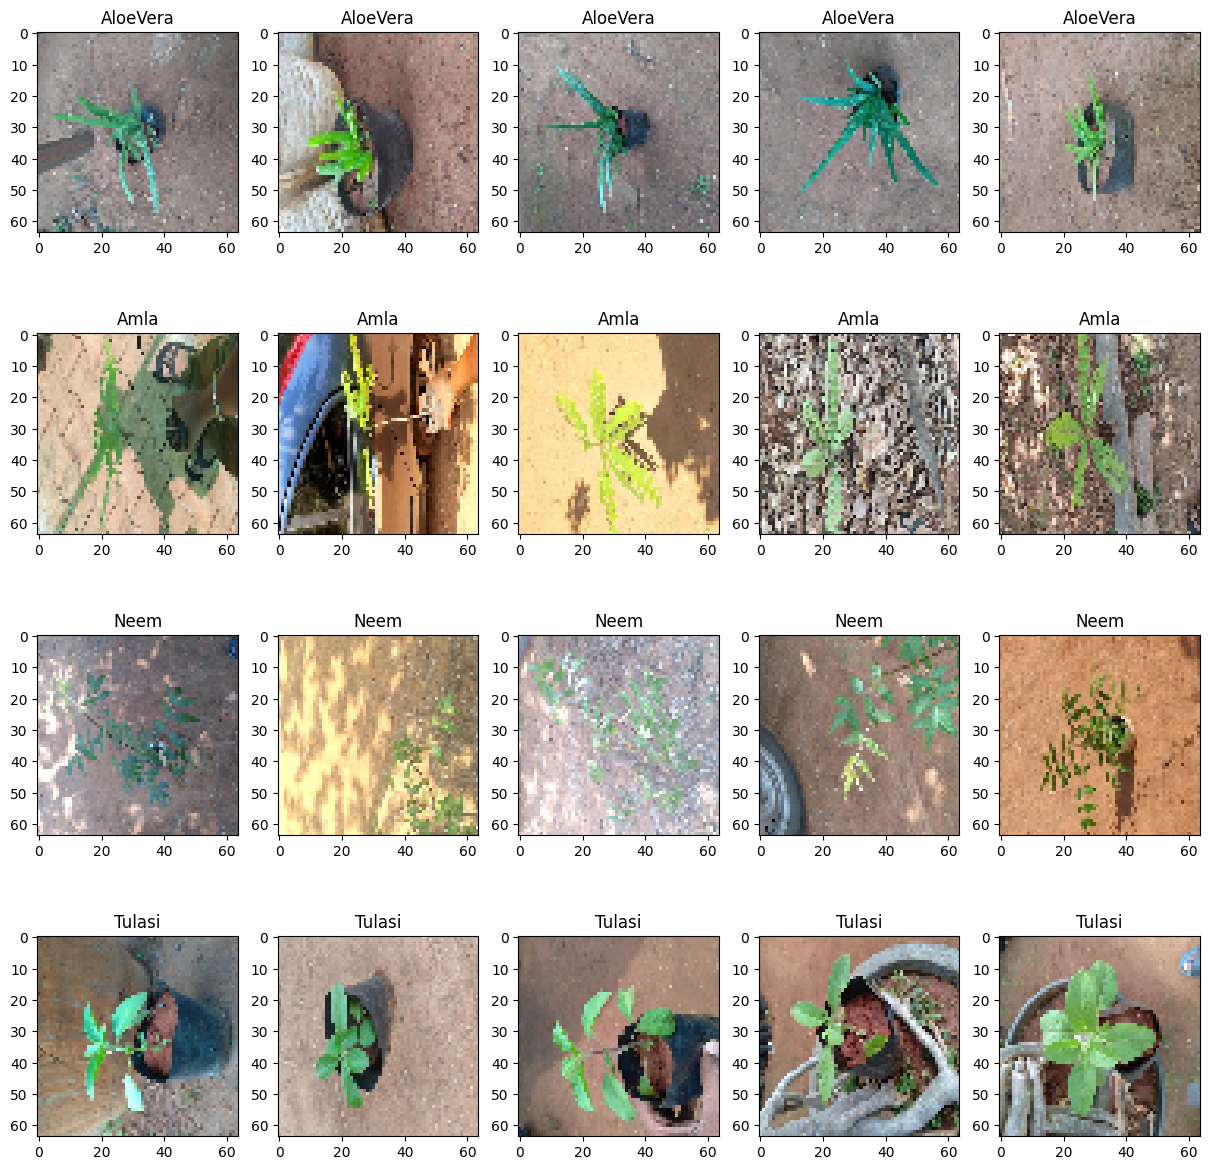

In [109]:
plt.figure(figsize=(15, 15))
sp=1
for n in range(0,40,2):
    plt.subplot(4, 5, sp) # 1 row, 5 columns
    plt.imshow(loaded_images[n])
    plt.title(loaded_labels[n])
    sp+=1

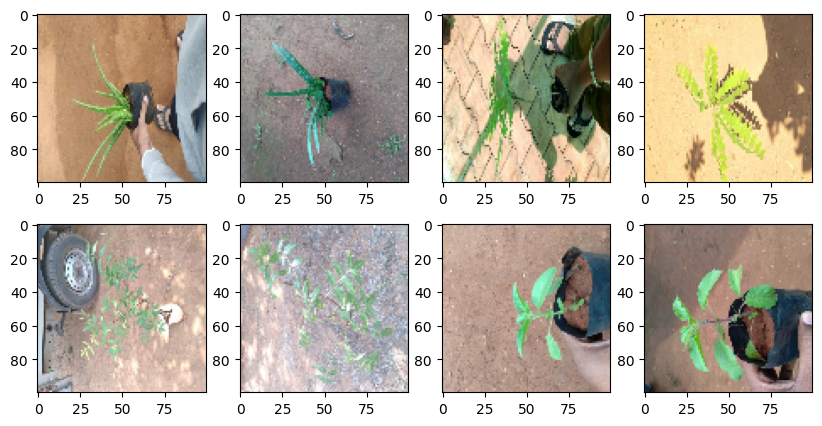

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
AloeVera_train, AloeVera_test, Amla_train, Amla_test, Neem_train, Neem_test, Tulasi_train, Tulasi_test = train_test_split(i[:10],i[10:20],i[20:30],i[30:40], test_size=0.8,train_size=0.2)
plt.figure(figsize=(10, 5))
sp=1
plt.subplot(2,4, sp)
plt.imshow(AloeVera_train[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(AloeVera_test[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Amla_train[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Amla_test[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Neem_train[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Neem_test[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Tulasi_train[0])
sp+=1
plt.subplot(2,4, sp)
plt.imshow(Tulasi_test[0])

In [75]:
#img_y=np.array([1,5,2,5,2,2,4])
#img_x=np.array([1,5,2,5,2,2,4])

In [76]:
img_x=loaded_images[0].flatten()
img_y=loaded_images[0].flatten()
#flattening the image
#to perform linear regression we need two colums i,e two arrays, but flattened image is simgle array, so we tryting to produce a relation of x=y
#by taking both the columns to be the same values
#img_x is the input array
#img_y is the output array
#function is y=x
#for linear regression we are trying to obtain the line y=mx+c where m is weights and c is bias
#to get the required function we are trying to make m=1 and c=0

In [81]:
class Perceptron:
    def __init__(self,x,y,weights=0.5, learning_rate=0.00001,b=0.02):
        #constructor to initialize 
        #while perfromning linear regression the value of weight moves faster than the value of bias
        #ie. it takes more epochs/iterations to for bias to reach the expected value than for weight to reach its expected value
        #in the data we have taken the input values have a large range as they represent colour value of picture, the range being 0-256
        #the larger the range of our data the smaller our learning rate has to be i.e for inputs in range of 10^0, learning rate is 0.1, for 10^2, 0.00001
        self.img_x=x
        self.img_y=y
        self.weights = weights  # Random initialization
        self.learning_rate = learning_rate # Learning rate
        self.b=b
    def forward_propogation(self):
        #this function is performing forward propogation
        #it return an array of predicted values
        y_pred=(self.weights*self.img_x)+self.b
        return y_pred
    def compute_mse(self,y_pred):
        #this functin is computing the mean square error
        m=self.img_y.shape[0]
        #this line obtains the length of our array
        cost=(1/m)*np.sum((self.img_y-y_pred)**2)
        #the returned is a single value as we sum up all the individual losses
        return cost
    def compute_gradients(self,y_pred):
        #here we compute gradients for the weight and bias
        m=self.img_y.shape[0]
        dw=(-2/m)*np.sum(self.img_x*(self.img_y-y_pred))
        db=(-2/m)*np.sum(self.img_y-y_pred)
        print(db)
        return dw,db
    def train(self,num_epochs):
        cost=0
        #loop for training
        for epoch in range(num_epochs):
            pred=self.forward_propogation()
            cost=self.compute_mse(pred)
            dw,db=self.compute_gradients(pred)
            print(f"loss: {cost}")
            print(f"Weight: {self.weights:.1f}")
            print(f"Bias: {self.b:.3f}")
            self.weights=self.weights-(self.learning_rate*dw)
            self.b=self.b-(self.learning_rate*db)
p1=Perceptron(img_x,img_y);
p1.train(10000)

-131.0716666666667
loss: 4476.495666666668
Weight: 0.5
Bias: 0.020
-84.10163259897558
loss: 1843.0472880316213
Weight: 0.7
Bias: 0.021
-53.96324398367809
loss: 758.8130524416899
Weight: 0.8
Bias: 0.022
-34.62490441576799
loss: 312.4158922913067
Weight: 0.9
Bias: 0.023
-22.216431553752994
loss: 128.62680129113423
Weight: 0.9
Bias: 0.023
-14.254517438903143
loss: 52.95779398988692
Weight: 0.9
Bias: 0.023
-9.14574401652456
loss: 21.803612668248082
Weight: 1.0
Bias: 0.023
-5.8676923441341025
loss: 8.976921154263797
Weight: 1.0
Bias: 0.023
-3.7643258650549307
loss: 3.695960197635061
Weight: 1.0
Bias: 0.024
-2.4146977972845862
loss: 1.5217012630379378
Weight: 1.0
Bias: 0.024
-1.5487070443602178
loss: 0.6265229131944782
Weight: 1.0
Bias: 0.024
-0.9930428567295796
loss: 0.2579631867952762
Weight: 1.0
Bias: 0.024
-0.6365001474689364
loss: 0.1062210541145755
Weight: 1.0
Bias: 0.024
-0.40772401568675
loss: 0.04374630935571961
Weight: 1.0
Bias: 0.024
-0.26092948857227816
loss: 0.018024424038430697